# LibRAG Exploratory Data Analysis

### First, we will import all of the potential relevant libraries for reading in our data, plotting, and analysis

In [79]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from textblob import TextBlob

### Below is the description of what each of the fields are and what they mean:

- https://github.com/boston-library/solr-core-conf/wiki/SolrDocument-field-reference:-public-API

### The entire JSON file for the metadata is 6.7GB large, containing 1.3 million documents, ~10% of which are full text.

The data was stored on BU's Shared Computing Cluster (SCC) in the /projectnb/sparkgrp/ml-bpl-rag-data directory, which was then downloaded onto our local machines.

In [29]:
import json

file = open("bpl_data.json")

bpl = json.load(file)

#print(bpl[3])

### Distribution of Sources by Date Added to Database

In [31]:
contents = bpl
first_entry = contents['Data'][0]
print(first_entry)

{'id': 'commonwealth-oai:xp68md23x', 'type': 'DigitalObject', 'attributes': {'id': 'commonwealth-oai:xp68md23x', 'system_create_dtsi': '2021-03-04T00:13:09Z', 'system_modified_dtsi': '2021-09-02T20:40:00Z', 'curator_model_ssi': 'Curator::DigitalObject', 'curator_model_suffix_ssi': 'DigitalObject', 'title_info_primary_tsi': 'من فضلكم توقفوا الأشخاص الذين ارتكبوا أسوأ الجرائم ضد المرأة عن الإفلات من العدالة الرجاء دعم المحكمة القضائية العالمية', 'genre_basic_ssim': ['Posters'], 'genre_specific_ssim': ['Political posters'], 'date_tsim': ['2005'], 'date_type_ssm': ['dateCreated'], 'date_edtf_ssm': ['2005'], 'date_start_dtsi': '2005-01-01T00:00:00Z', 'date_end_dtsi': '2005-12-31T23:59:59.999Z', 'name_tsim': ['Amnesty International', 'Smith, Sean', 'The Guardian'], 'name_role_tsim': ['Creator', 'Contributor', 'Contributor'], 'name_facet_ssim': ['Amnesty International', 'Smith, Sean', 'The Guardian'], 'related_item_host_ssim': ['Stephen Lewis poster collection, circa 1921-2017'], 'subject_top

In [32]:
df = pd.DataFrame(contents['Data'])
df.head(90)

,id,type,attributes,links
0,commonwealth-oai:xp68md23x,DigitalObject,"{'id': 'commonwealth-oai:xp68md23x', 'system_c...",{'self': 'https://www.digitalcommonwealth.org/...
1,commonwealth-oai:xp68m844v,DigitalObject,"{'id': 'commonwealth-oai:xp68m844v', 'system_c...",{'self': 'https://www.digitalcommonwealth.org/...
2,commonwealth-oai:xp68mb49n,DigitalObject,"{'id': 'commonwealth-oai:xp68mb49n', 'system_c...",{'self': 'https://www.digitalcommonwealth.org/...
3,commonwealth-oai:xp68mc60v,DigitalObject,"{'id': 'commonwealth-oai:xp68mc60v', 'system_c...",{'self': 'https://www.digitalcommonwealth.org/...
4,commonwealth-oai:xp68mc72n,DigitalObject,"{'id': 'commonwealth-oai:xp68mc72n', 'system_c...",{'self': 'https://www.digitalcommonwealth.org/...
...,...,...,...,...
85,commonwealth:8336kn659,DigitalObject,"{'id': 'commonwealth:8336kn659', 'system_creat...",{'self': 'https://www.digitalcommonwealth.org/...
86,commonwealth:rx9168745,DigitalObject,"{'id': 'commonwealth:rx9168745', 'system_creat...",{'self': 'https://www.digitalcommonwealth.org/...
87,commonwealth:m326pp11z,DigitalObject,"{'id': 'commonwealth:m326pp11z', 'system_creat...",{'self': 'https://www.digitalcommonwealth.org/...
88,commonwealth:xg94mb31j,DigitalObject,"{'id': 'commonwealth:xg94mb31j', 'system_creat...",{'self': 'https://www.digitalcommonwealth.org/...


In [33]:
print(df.dtypes)
print(df.isnull().sum())

id            object
type          object
attributes    object
links         object
dtype: object
id            0
type          0
attributes    0
links         0
dtype: int64


In [35]:
df_attributes = pd.json_normalize(df['attributes'])
df_attributes = pd.concat([df.drop(columns=['attributes']), df_attributes], axis=1)
df_attributes.head(10)

,id,type,links,id,system_create_dtsi,system_modified_dtsi,curator_model_ssi,curator_model_suffix_ssi,title_info_primary_tsi,genre_basic_ssim,...,storage_key_base_ss,identifier_issn_ssim,frequency_tsi,contained_by_ssi,note_credits_tsim,identifier_isbn_ssim,identifier_music_publisher_ssim,note_arrangement_tsim,transcription_ark_id_ssi,transcription_key_base_ss
0,commonwealth-oai:xp68md23x,DigitalObject,{'self': 'https://www.digitalcommonwealth.org/...,commonwealth-oai:xp68md23x,2021-03-04T00:13:09Z,2021-09-02T20:40:00Z,Curator::DigitalObject,DigitalObject,من فضلكم توقفوا الأشخاص الذين ارتكبوا أسوأ الج...,[Posters],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,commonwealth-oai:xp68m844v,DigitalObject,{'self': 'https://www.digitalcommonwealth.org/...,commonwealth-oai:xp68m844v,2021-03-03T23:58:44Z,2021-09-02T20:21:32Z,Curator::DigitalObject,DigitalObject,海员们 : 要警惕航运事故,[Posters],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,commonwealth-oai:xp68mb49n,DigitalObject,{'self': 'https://www.digitalcommonwealth.org/...,commonwealth-oai:xp68mb49n,2021-03-04T00:06:25Z,2021-09-02T20:30:29Z,Curator::DigitalObject,DigitalObject,人間としての尊厳を保てる : 生活賃金を,[Posters],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,commonwealth-oai:xp68mc60v,DigitalObject,{'self': 'https://www.digitalcommonwealth.org/...,commonwealth-oai:xp68mc60v,2021-03-04T00:10:40Z,2021-09-02T20:35:20Z,Curator::DigitalObject,DigitalObject,野火,[Posters],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,commonwealth-oai:xp68mc72n,DigitalObject,{'self': 'https://www.digitalcommonwealth.org/...,commonwealth-oai:xp68mc72n,2021-03-04T00:11:07Z,2021-09-02T20:35:52Z,Curator::DigitalObject,DigitalObject,野火,[Posters],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,commonwealth-oai:xp68mc992,DigitalObject,{'self': 'https://www.digitalcommonwealth.org/...,commonwealth-oai:xp68mc992,2021-03-04T00:12:14Z,2021-09-02T20:36:59Z,Curator::DigitalObject,DigitalObject,團結 抗強權,[Posters],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,commonwealth-oai:xp68m804w,DigitalObject,{'self': 'https://www.digitalcommonwealth.org/...,commonwealth-oai:xp68m804w,2021-03-03T23:57:00Z,2021-09-02T20:19:35Z,Curator::DigitalObject,DigitalObject,大队的夜晩 (年画) 史惠芳作,[Posters],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,commonwealth-oai:xp68m8365,DigitalObject,{'self': 'https://www.digitalcommonwealth.org/...,commonwealth-oai:xp68m8365,2021-03-03T23:58:27Z,2021-09-02T20:21:12Z,Curator::DigitalObject,DigitalObject,морякам,[Posters],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,commonwealth:8k71nz966,DigitalObject,{'self': 'https://www.digitalcommonwealth.org/...,commonwealth:8k71nz966,2015-09-14T22:06:01Z,2022-07-08T19:59:21Z,Curator::DigitalObject,DigitalObject,A,[Prints],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,commonwealth:8k71p000r,DigitalObject,{'self': 'https://www.digitalcommonwealth.org/...,commonwealth:8k71p000r,2015-09-14T22:06:33Z,2022-07-08T19:59:21Z,Curator::DigitalObject,DigitalObject,E,[Prints],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_attributes['date_edtf_ssm'].head(100)

0            [2005]
1            [2009]
2            [2005]
3            [2015]
4            [2015]
          ...      
95    [1900~/1906~]
96    [1907~/1915~]
97    [1907~/1915~]
98    [1907~/1915~]
99    [1907~/1915~]
Name: date_edtf_ssm, Length: 100, dtype: object

In [37]:
# Convert the 'date_edtf_ssm' column to string format (if needed)
df_attributes['date_edtf_ssm'] = df_attributes['date_edtf_ssm'].astype(str)

# Now group by the 'date_edtf_ssm' column and count the occurrences
date_counts = df_attributes.groupby('date_edtf_ssm').size().reset_index(name='count')
date_counts

,date_edtf_ssm,count
0,['-0605~/-0562~'],1
1,['-2000~'],1
2,['-2350~'],7
3,['-8000~/1500~'],33
4,['0000'],1
...,...,...
97564,['2024-03-05'],8
97565,['2873-07-02'],1
97566,['~1918'],1
97567,['~1946/~1950'],1


In [38]:
date_counts_sorted = date_counts.sort_values(by='count', ascending=False)
date_counts_sorted

,date_edtf_ssm,count
97568,nan,78693
55803,['1930~/1945~'],26066
65239,['1950~/1955~'],9781
57706,['1934~/1956~'],8447
41198,['1900~/1980~'],7242
...,...,...
97513,['2023-01-01'],1
97514,['2023-01-02'],1
97515,['2023-01-08'],1
97516,['2023-01-15'],1


In [39]:
#function to extract the first 4 digits before the '/' sign to find the year
def extract_first_value(val):
    if '/' in val:
        return val.split('/')[0][:8]
    return val

#function to clean unwanted characters
def clean_characters(val):
    return val.replace('[', '').replace(']', '').replace('~', '').replace("'", '').replace("?", '')

import re

#function to remove hyphen only if it's part of a 4-digit year
def remove_hyphen_in_year(val):
    if re.search(r'\b\d{4}\b', val) and '-' in val and len(val) == 5:
        return val.replace('-', '')  # Remove hyphen for 4-digit year only
    return val  # Keep the value as is for other formats

#function to extract the first 4 digits if the string contains a hyphen (for longer dates)
def extract_year(val):
    if '-' in val:
        return val[:4]
    return val

df_attributes['date_edtf_ssm_transformed'] = df_attributes['date_edtf_ssm'].apply(extract_first_value)
df_attributes['date_edtf_ssm_cleaned'] = df_attributes['date_edtf_ssm_transformed'].apply(clean_characters)
df_attributes['date_edtf_ssm_cleaned2'] = df_attributes['date_edtf_ssm_cleaned'].apply(remove_hyphen_in_year)
df_attributes['date'] = df_attributes['date_edtf_ssm_cleaned2'].apply(extract_year)

date_counts_final = df_attributes.groupby('date').size().reset_index(name='count')
date_counts_sorted_final = date_counts_final.sort_values(by='count', ascending=False)
date_counts_sorted_final

,date,count
736,nan,78693
561,1930,42652
505,1900,20988
644,1970,20812
601,1950,19613
...,...,...
19,1285,1
20,1295,1
22,1311,1
23,1314,1


In [47]:
date_counts_sorted_final_clean = date_counts_sorted_final.dropna(subset=['date'])

In [48]:
min_date = date_counts_sorted_final_clean[date_counts_sorted_final['date'].notna() & (date_counts_sorted_final['date'] != 0)]['date'].min()
max_date = date_counts_sorted_final_clean[date_counts_sorted_final['date'].notna()]['date'].max()
print(min_date)
print(max_date)

21.0
8000.0


/var/folders/xq/fj3st__56r54gz9tdvb7d2k40000gn/T/ipykernel_9224/2027597972.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_date = date_counts_sorted_final_clean[date_counts_sorted_final['date'].notna() & (date_counts_sorted_final['date'] != 0)]['date'].min()
/var/folders/xq/fj3st__56r54gz9tdvb7d2k40000gn/T/ipykernel_9224/2027597972.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  max_date = date_counts_sorted_final_clean[date_counts_sorted_final['date'].notna()]['date'].max()


/var/folders/xq/fj3st__56r54gz9tdvb7d2k40000gn/T/ipykernel_9224/831745880.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_date_counts = date_counts_sorted_final_clean[date_counts_sorted_final['count'] > 1000]


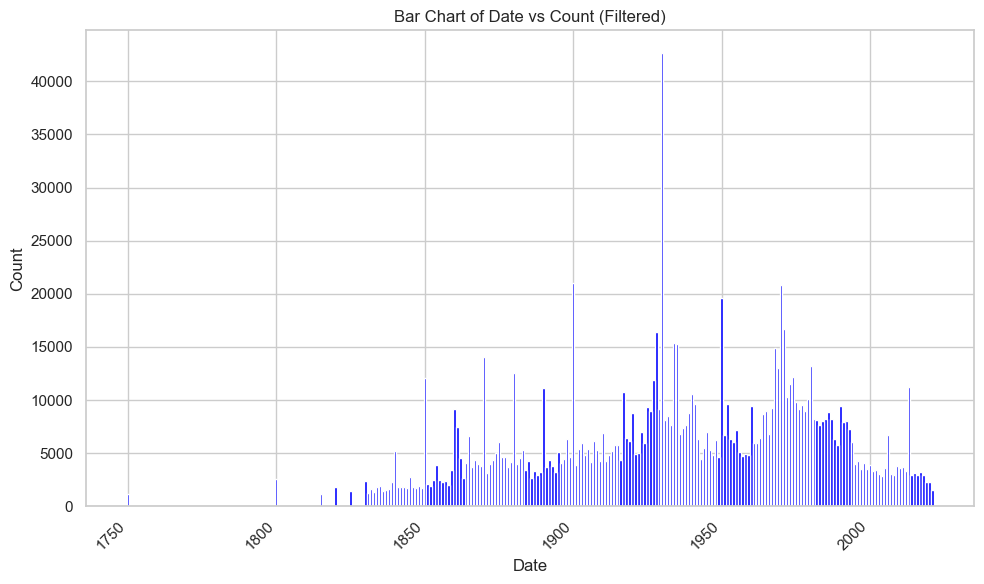

In [51]:
import matplotlib.pyplot as plt
#filtering to include only rows where 'count' is greater than 1000, because otherwise the chart is very messy
filtered_date_counts = date_counts_sorted_final_clean[date_counts_sorted_final['count'] > 1000]

plt.figure(figsize=(10,6))
plt.bar(filtered_date_counts['date'], filtered_date_counts['count'], color='blue')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Bar Chart of Date vs Count (Filtered)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

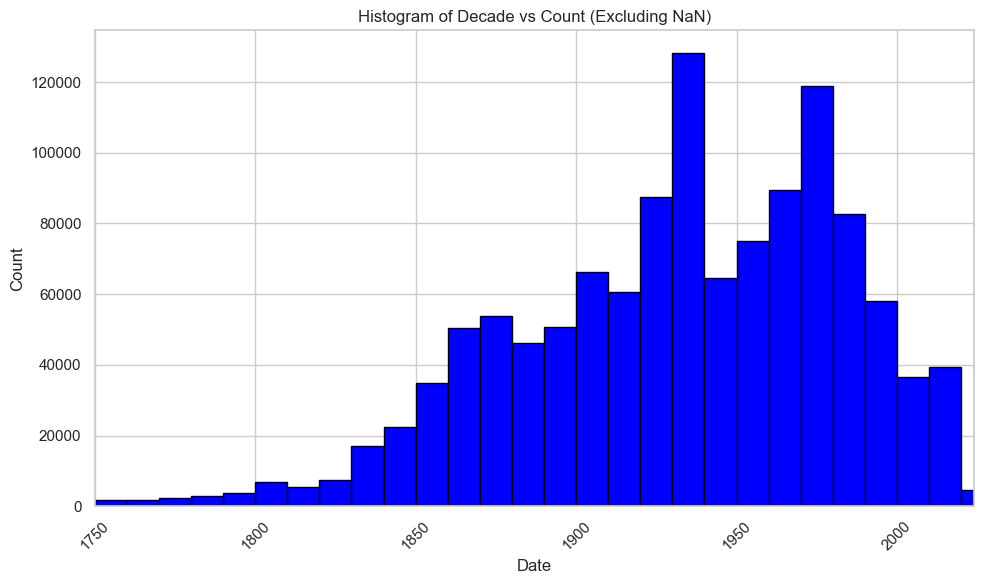

In [74]:
#trying to build a histogram because the bar graph can be a little uninterpretable
nan_counts = date_counts_sorted_final[date_counts_sorted_final['date'].isna()]['count'].sum()

date_counts_sorted_final['date'] = pd.to_numeric(date_counts_sorted_final['date'], errors='coerce')
numeric_data = date_counts_sorted_final.dropna(subset=['date'])
bins = range(int(numeric_data['date'].min()), int(numeric_data['date'].max()) + 100, 10)  # 10-year bins
plt.figure(figsize=(10,6))
plt.hist(numeric_data['date'], bins=bins, weights=numeric_data['count'], color='blue', edgecolor='black')

#wanted to add a bar for nan values too, but it did not work as i expected it to
# if nan_counts > 0:
#     plt.bar('NaN', nan_counts, color='red', edgecolor='black')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Histogram of Decade vs Count (Excluding NaN)')
plt.xticks(rotation=45)
plt.xlim(1750, 2024)

# Display the histogram
plt.tight_layout()
plt.show()

### Distribution of Sources By Type (Text, Audio, Video, Image)

We'll see what each document looks like first:

In [6]:
num = 0
print(type(bpl))
print(bpl['Data'][0])

<class 'dict'>
{'id': 'commonwealth-oai:xp68md23x', 'type': 'DigitalObject', 'attributes': {'id': 'commonwealth-oai:xp68md23x', 'system_create_dtsi': '2021-03-04T00:13:09Z', 'system_modified_dtsi': '2021-09-02T20:40:00Z', 'curator_model_ssi': 'Curator::DigitalObject', 'curator_model_suffix_ssi': 'DigitalObject', 'title_info_primary_tsi': 'من فضلكم توقفوا الأشخاص الذين ارتكبوا أسوأ الجرائم ضد المرأة عن الإفلات من العدالة الرجاء دعم المحكمة القضائية العالمية', 'genre_basic_ssim': ['Posters'], 'genre_specific_ssim': ['Political posters'], 'date_tsim': ['2005'], 'date_type_ssm': ['dateCreated'], 'date_edtf_ssm': ['2005'], 'date_start_dtsi': '2005-01-01T00:00:00Z', 'date_end_dtsi': '2005-12-31T23:59:59.999Z', 'name_tsim': ['Amnesty International', 'Smith, Sean', 'The Guardian'], 'name_role_tsim': ['Creator', 'Contributor', 'Contributor'], 'name_facet_ssim': ['Amnesty International', 'Smith, Sean', 'The Guardian'], 'related_item_host_ssim': ['Stephen Lewis poster collection, circa 1921-2017'

In [8]:
has_type = 0
no_type = 0
types_primary = []
types_secondary = []

for i in range(len(bpl['Data'])):
    attribute = bpl['Data'][i]['attributes']
    if 'type_of_resource_ssim' in attribute:
        has_type += 1
        types_primary += [attribute['type_of_resource_ssim'][0]]
        if len(attribute['type_of_resource_ssim']) > 1:
            types_secondary += [attribute['type_of_resource_ssim'][1]]
            #print(bpl[i]['data'][0]['attributes']['type_of_resource_ssim'])
    else:
        no_type += 1

print(types_primary)
print(set(types_secondary))

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [36]:
types_dict = {}

for t in types_primary:
    if t not in types_dict:
        types_dict[t] = 1
    else:
        types_dict[t] += 1

print(types_dict)
print("\n")
print("Verify that we have 1.3 million documents: ", len(types_primary))

{'Still image': 626480, 'Audio': 41473, 'Moving image': 57609, 'Text': 490984, 'Mixed material': 21544, 'Artifact': 41524, 'Cartographic': 19980, 'Notated music': 419, 'Manuscript': 187}


Verify that we have 1.3 million documents:  1300200


**Now we can actually plot this data:**

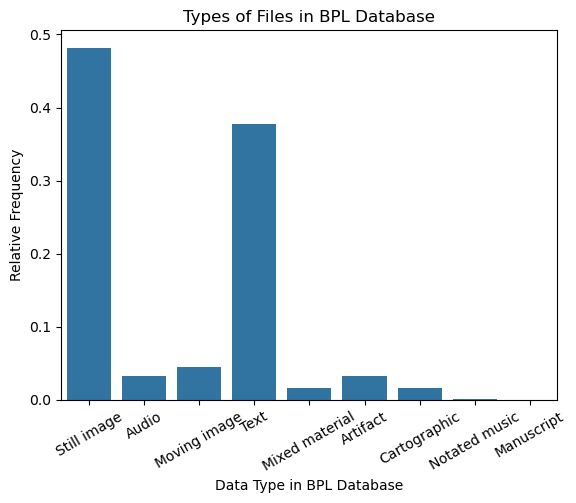

In [32]:
total_count = sum(types_dict.values())

relative_frequencies = {k: v / total_count for k, v in types_dict.items()}

datatypes = list(relative_frequencies.keys())
#datatypes += ['No Type']
frequencies = list(relative_frequencies.values())
#frequencies += [no_type/total_count]

sns.barplot(x=datatypes, y=frequencies)
plt.title("Types of Files in BPL Database")
plt.xlabel("Data Type in BPL Database")
plt.ylabel("Relative Frequency")
plt.xticks(rotation=30)
plt.show()

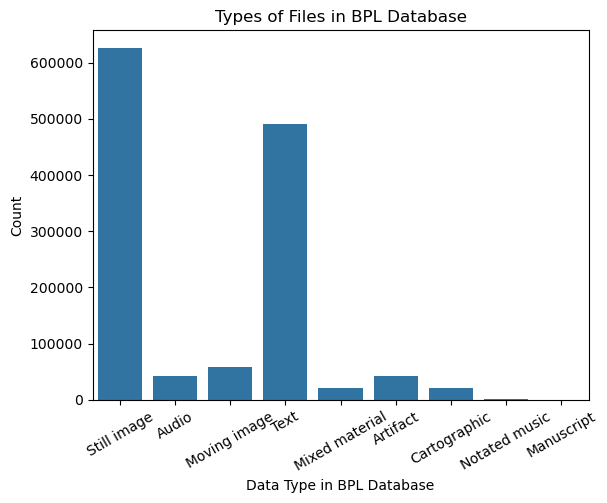

In [33]:
sns.barplot(types_dict)
plt.title("Types of Files in BPL Database")
plt.xlabel("Data Type in BPL Database")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

### What if we want to know if some non-text sources also have additional text in their abstract?

Some of the documents have more than one type of document type that they fall under. Some of the images in the database have text that describes the image (very well-detailed, I would say).

In [41]:
types_dict_sec = {}

for t in types_secondary:
    if t not in types_dict_sec:
        types_dict_sec[t] = 1
    else:
        types_dict_sec[t] += 1

print(types_dict_sec)
print("Proportion of documents that also have text descriptions: ", len(types_secondary) / (len(types_primary) + len(types_secondary)))

{'Text': 37284, 'Still image': 4434, 'Manuscript': 1891, 'Artifact': 28, 'Audio': 23, 'Cartographic': 22, 'Moving image': 3}
Proportion of documents that also have text descriptions:  0.03250650167239012


In [40]:
print(len(types_secondary))

43685


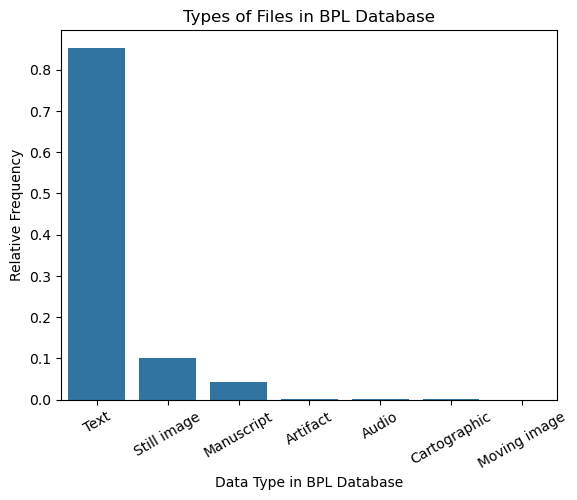

In [39]:
total_count = sum(types_dict_sec.values())

relative_frequencies = {k: v / total_count for k, v in types_dict_sec.items()}

datatypes = list(relative_frequencies.keys())
#datatypes += ['No Type']
frequencies = list(relative_frequencies.values())
#frequencies += [no_type/total_count]

sns.barplot(x=datatypes, y=frequencies)
plt.title("Types of Files in BPL Database")
plt.xlabel("Data Type in BPL Database")
plt.ylabel("Relative Frequency")
plt.xticks(rotation=30)
plt.show()

### Distribution of Lengths of Descriptions

We'd like to get the length of the descriptions for each of the files. See whether it is "lazy slop" or actually descriptive.

This will be useful when we implement the rag on the full-text data, before chunking, and will increase the quality of retrieval for images and audio.

In [55]:
abstracts = []
abstract_types = {}

for i in range(len(bpl['Data'])):
    attribute = bpl['Data'][i]['attributes']
    if 'abstract_tsi' in attribute:
        abstracts += [attribute['abstract_tsi']]
        #print(attribute['abstract_tsi'])

print("Proportion of documents that have descriptive abstracts:", len(abstracts) / len(types_primary))

Proportion of documents that have descriptive abstracts: 0.4995139209352407


Median:  20.0
Mode Range:  ModeResult(mode=7, count=49135)
Max:  7338


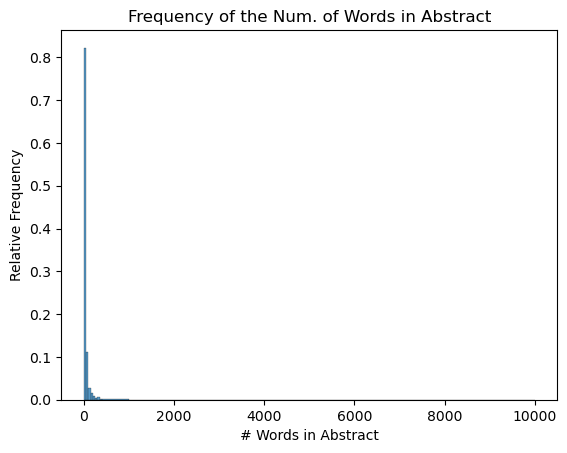

In [79]:
from scipy import stats as st

# get number of words in each abstract
abstract_len = [len(x.split()) for x in abstracts]

print("Median: ", np.median(abstract_len))
print("Mode Range: ", st.mode(abstract_len))
print("Max: ", np.max(abstract_len))
bin_edges = [0, 50, 100, 150, 200, 250, 300, 350, 400, 1000, 10000]

# Now we will plot the data
sns.histplot(abstract_len, stat="probability", bins=bin_edges)
plt.title("Frequency of the Num. of Words in Abstract")
plt.xlabel("# Words in Abstract")
plt.ylabel("Relative Frequency")
plt.show()

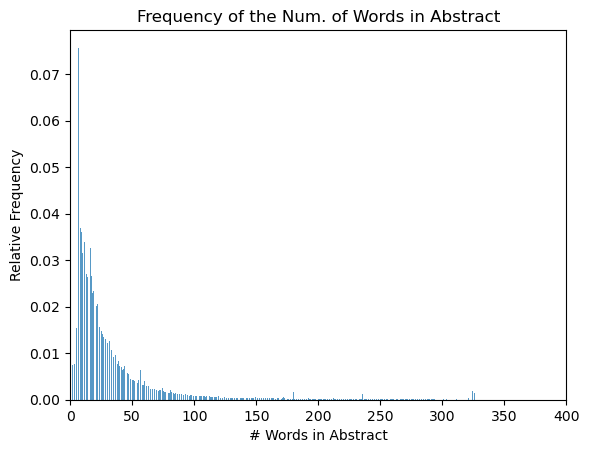

In [67]:
# Now we will plot the data
sns.histplot(abstract_len, stat="probability")
# since there are not many entries with an abstract beyond 400 words
plt.xlim(0, 400)
plt.title("Frequency of the Num. of Words in Abstract")
plt.xlabel("# Words in Abstract")
plt.ylabel("Relative Frequency")
plt.show()

### Number of Words in Abstract for each Data Type

#### Below is some code displaying the distribution of how many words there are in each file, based on its file type.

#### This will be useful once we implement RAG because for the non-full-text documents (images, videos, audios), we can easily embed the text i of the abstract rather than using a multi-model approach to categorize/describe the documents.

Median:  23.5
Mode Range:  ModeResult(mode=15, count=11)


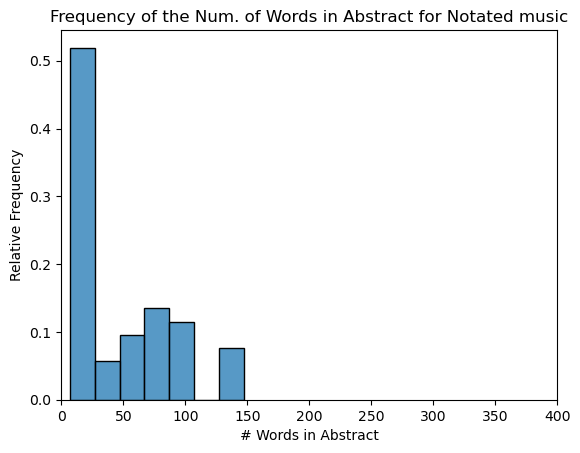

Median:  21.0
Mode Range:  ModeResult(mode=10, count=1596)


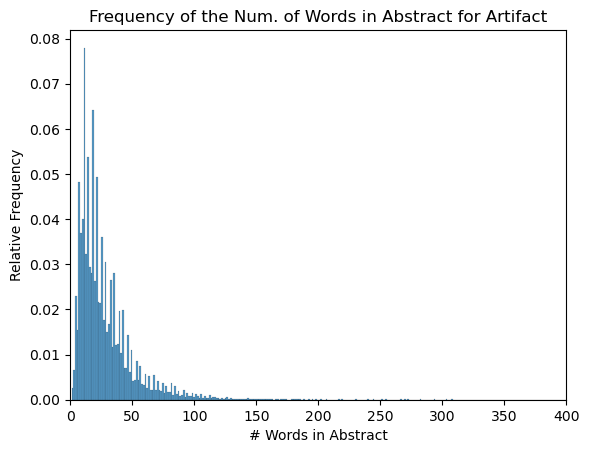

Median:  26.0
Mode Range:  ModeResult(mode=6, count=138)


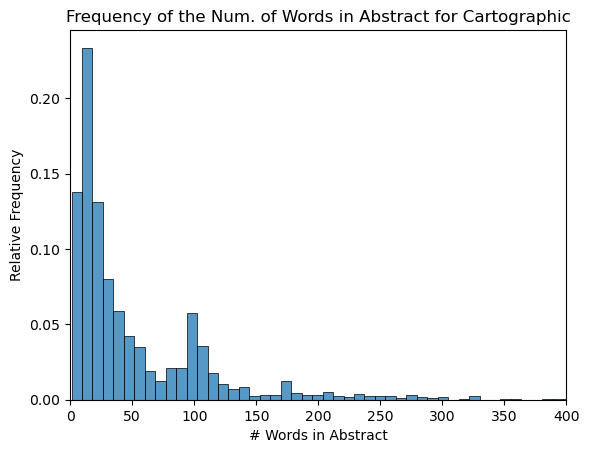

Median:  25.0
Mode Range:  ModeResult(mode=14, count=637)


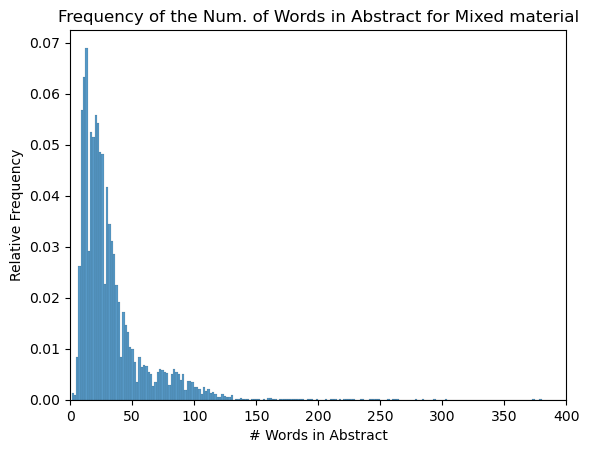

Median:  18.0
Mode Range:  ModeResult(mode=16, count=10710)


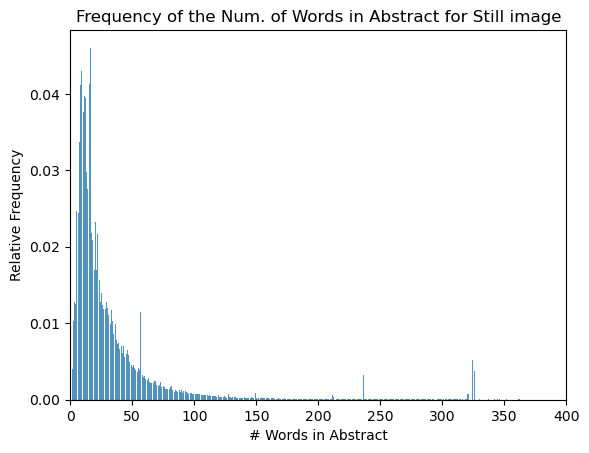

Median:  44.0
Mode Range:  ModeResult(mode=4, count=1464)


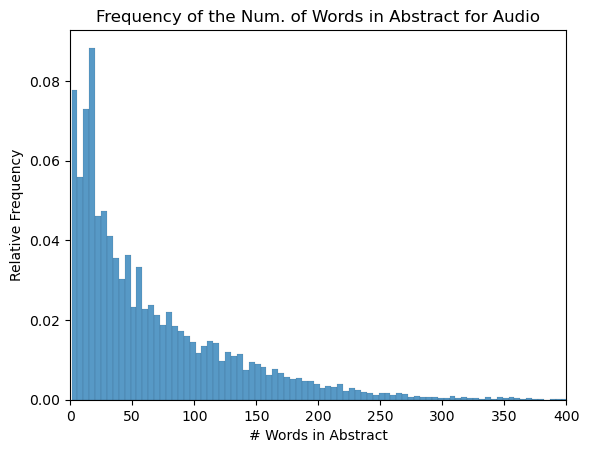

Median:  19.5
Mode Range:  ModeResult(mode=9, count=62)


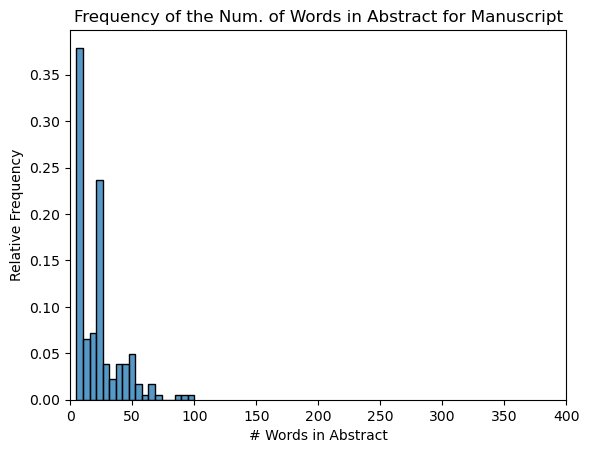

Median:  35.0
Mode Range:  ModeResult(mode=9, count=2803)


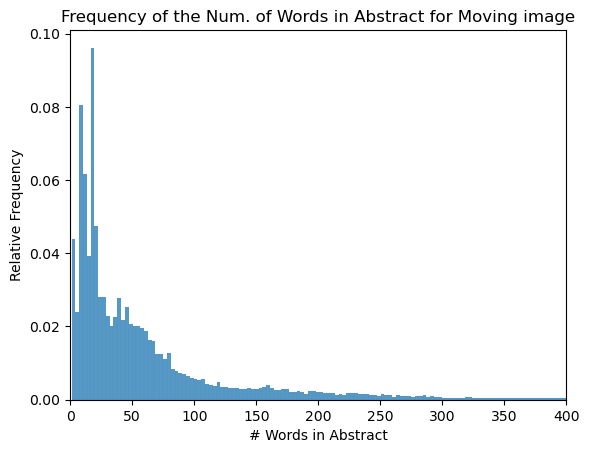

Median:  17.0
Mode Range:  ModeResult(mode=7, count=42276)


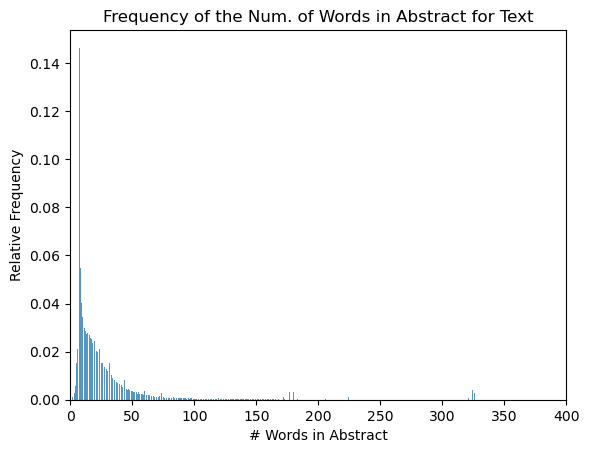

In [68]:
from scipy import stats as st
def process_types(t, x_lim):
    abstracts = []
    abstract_types = {}
    
    # Find the specific types
    for i in range(len(bpl['Data'])):
        attribute = bpl['Data'][i]['attributes']
        if 'type_of_resource_ssim' in attribute:
            if t in attribute['type_of_resource_ssim']:
                if 'abstract_tsi' in attribute:
                    abstracts += [attribute['abstract_tsi']]
                    
    abstract_len = [np.char.count(x, ' ') + 1 for x in abstracts]
    
    print("Median: ", np.median(abstract_len))
    print("Mode Range: ", st.mode(abstract_len))
    
    # Now we will plot the data
    sns.histplot(abstract_len, stat="probability")
    plt.title(f"Frequency of the Num. of Words in Abstract for {t}")
    plt.xlim(0, x_lim)
    plt.xlabel("# Words in Abstract")
    plt.ylabel("Relative Frequency")
    plt.show()  



for t in set(types_dict.keys()):
    process_types(t, 400)

# Getting Full-Text Documents

#### Now we are going to analyze the full-text documents for their topics.

In [24]:
file = open("ft_13_checkpoint_10_133.json")

full_text = json.load(file)

In [25]:
print(full_text['commonwealth:w3764603d']['text'])

Charlotte N.C.
Feb 21st/57
Z.B. Oaks Esq
Charleston S.C.
Dr Sr
I take the
Liberty to Address you as Regards
your Negro Market & your
Opinion as to how it will continue
through the Spring & Summer
I have an Idea of Trying To puchase
in the Mountians of N.C. & Va
& Selling in your Market or in
Richmond Va. I expect to Trade
on the Small Scale for Some
Market & if I can Sell in
your Market for a fair profit
I Shall do my Buisiness with
you & C

I wish To no what Boys from 18 to
20 yrs old [deletion]and[/deletion] both no 1 & no 2 Boys
also Boys 12 ys old Say weigs 80 to 90
lbs & girls 12 ys old weighs Say 60 to
80 lb & from 14 To ys old To 20 ys old
Please write me by Return Mail
& give me the Market prices of
above Negros & [deletion][/deletion] are they [deletion][/deletion]
Brisk Sale or dull Address
me Charlotte N.C.
Yours Respectfully
T.H. Jones




### We tried to use the OpenAI ChatGPT API to categorize documents and then organizing them based on the category of the document (such as the Civil War, WWII, etc.) using an OpenAI key. However, OpenAI has a quota limit on how many times you could use it, which made debugging impossible after a certain point without paying for it.

In [36]:
for text in full_text:
    print(full_text[text]['text'])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Sentiment Analysis:

In [78]:
# import nltk
# nltk.download('vader_lexicon')

### Below are two plots taking a look at the polarity and subjectivity of the texts.
#### - Polarity basically measures the negative or positive sentiment of the text, essentially analyzing the author's tone.
#### - Subjectivity measures how much of the text is based on opinion or fact

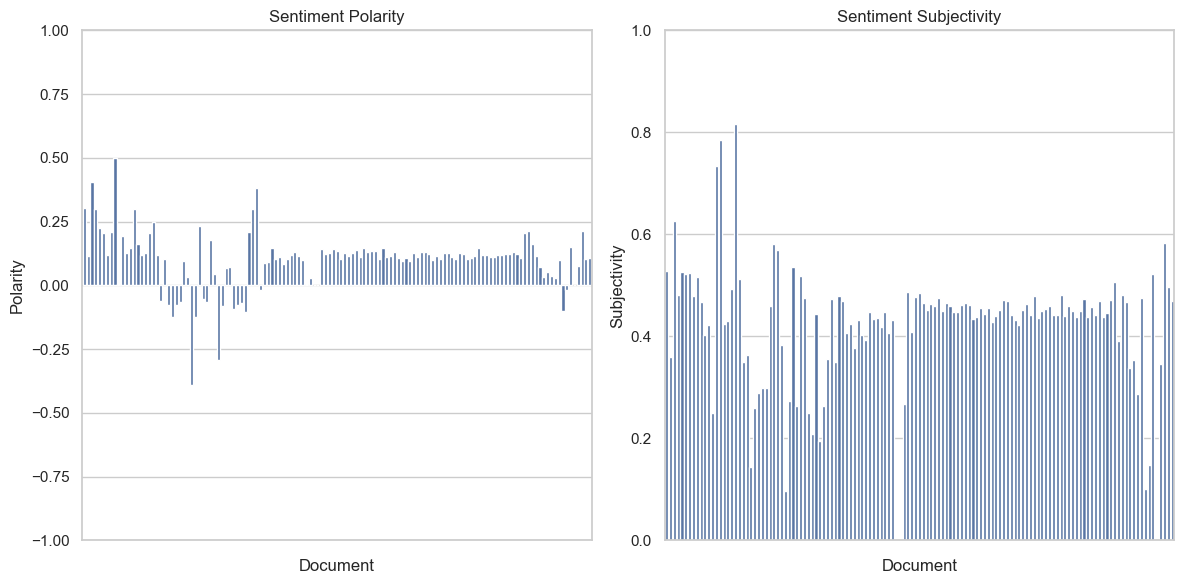

In [28]:
# Function to perform sentiment analysis
def analyze_sentiment(documents):
    results = []
    for doc_id, content in documents.items():
        text = content['text']
        blob = TextBlob(text)
        # Getting the polarity and subjectivity
        results.append({
            'Document': doc_id,
            'Polarity': blob.sentiment.polarity,
            'Subjectivity': blob.sentiment.subjectivity
        })
    return pd.DataFrame(results)

# Analyze the sentiments of the documents
sentiment_df = analyze_sentiment(full_text)

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Polarity
sns.barplot(x='Document', y='Polarity', data=sentiment_df, ax=axes[0])
axes[0].set_title('Sentiment Polarity')
axes[0].set_ylim(-1, 1)  # Setting limits for better visualization
axes[0].set_xticklabels([])  # Hide x-tick labels

# Plot Subjectivity
sns.barplot(x='Document', y='Subjectivity', data=sentiment_df, ax=axes[1])
axes[1].set_title('Sentiment Subjectivity')
axes[1].set_ylim(0, 1)  # Setting limits for better visualization
axes[1].set_xticklabels([])  # Hide x-tick labels

# Show the plots
plt.tight_layout()
plt.show()


### We can see that the majority of the documents have a positive sentiment, potentially indicating more neutral sources, whereas the ones with negative sentiment may be critiques, essays, or other similar texts.

### Many of the texts have higher subjectivity, whereas some have virtually none. Sources like the latter may be history or science texts.

### Issues with Data:

#### Some of the text at first seemed to contain unreadable unicode characters at first, but I believe this issue was resolved once I no longer used the NLTK library for sentiment analysis.